## Introducion to Seaborn


In [2]:
# import modules
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
sns.set_theme() # stylling

### Numerical Plots
* Distribution: Histogram, KDE (Kernel Density Estimate)
* Bar plot 
* Count Plot 
* Facet Plot: create a 2D grid consisting of tables, where are multiple variables devided into columns and rows.
* Box plot: method of graphically describing groups of numerical data through their elements.
* Join plot 
* Pair plot
* Heat plot: the intensity of appearance of an object

###

#### Distribution Plot
* Univariate distribution of observations

In [4]:
# get data set 
tips_df = sns.load_dataset("tips")
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


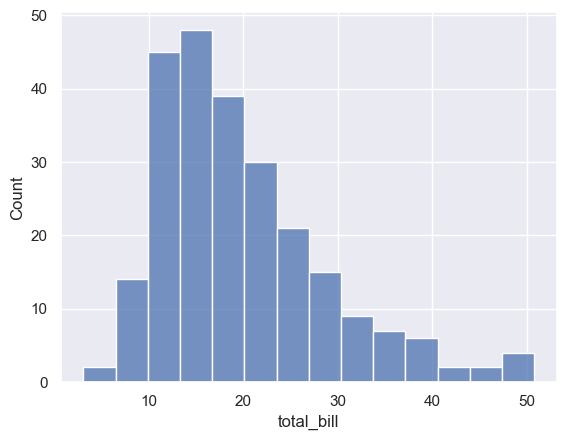

In [27]:
sns.histplot(data = tips_df.total_bill);

In [14]:
tips_df["total_bill"].value_counts().sort_values(ascending = False)

total_bill
13.42    3
7.25     2
21.01    2
20.69    2
10.34    2
        ..
29.03    1
27.18    1
22.67    1
17.82    1
18.78    1
Name: count, Length: 229, dtype: int64

#### KDE PLot
* A kernel density estimate (KDE) plot is a method for vizualizing the distribution of observations in dataset, analagous to a histogram. 
* KDE requests the data using a continuous proability density curve in one ore more dimensions.

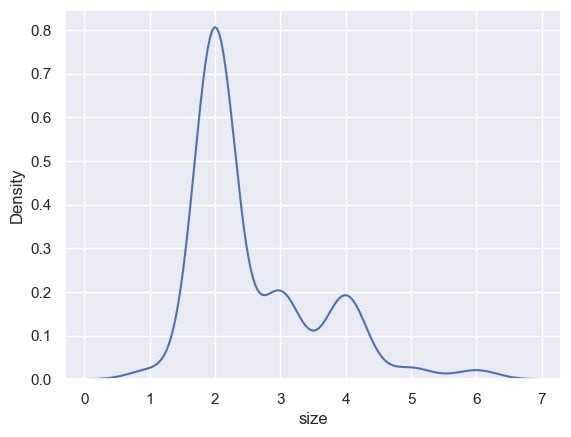

In [28]:
sns.kdeplot(data = tips_df['size']);

#### Displot
* Information distibutional summaries
* Statistical ananlyes nunique knowledge about the distribution of variables in your dataset. 
* The seaborn function displot supports several approaches to visualizing distributions, These include classic techniques like histogram and computationally_intensive approaches like kernel density estimate.

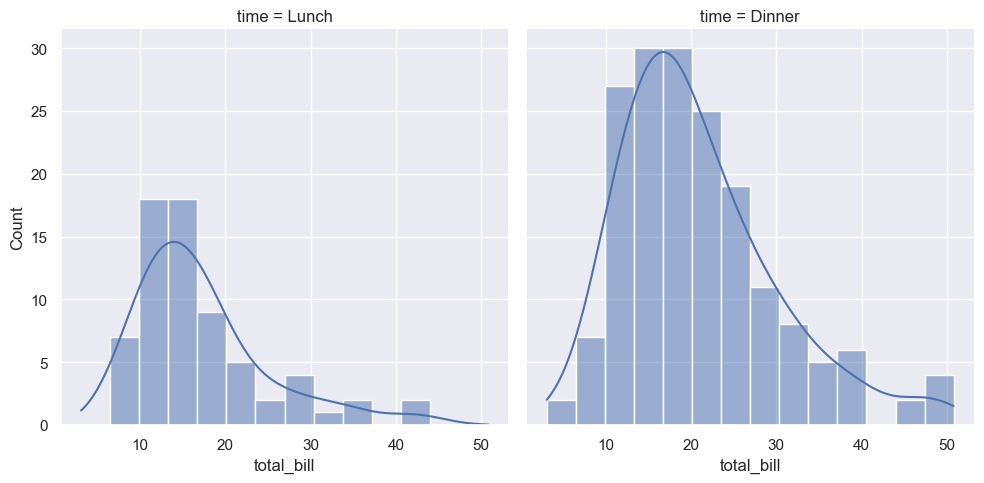

In [29]:
sns.displot(data = tips_df,x = "total_bill",col = "time", kde = True);

#### Categories Plots 
* Bar plots

C:\Users\admin\AppData\Local\Temp\ipykernel_23976\2249962310.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender = tips_df.groupby("sex")["tip"].mean()


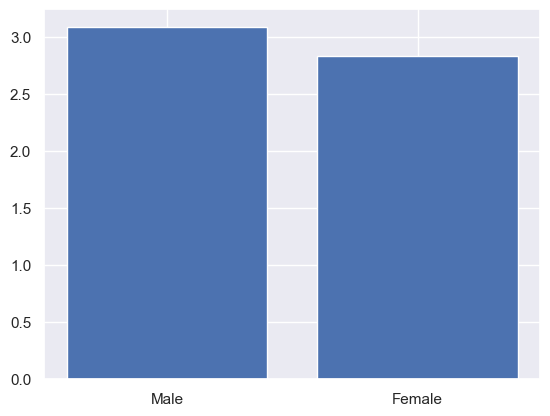

In [44]:
# what's gender tip more 
gender = tips_df.groupby("sex")["tip"].mean()
plt.bar(gender.index,gender.values);


<Axes: xlabel='sex', ylabel='tip'>

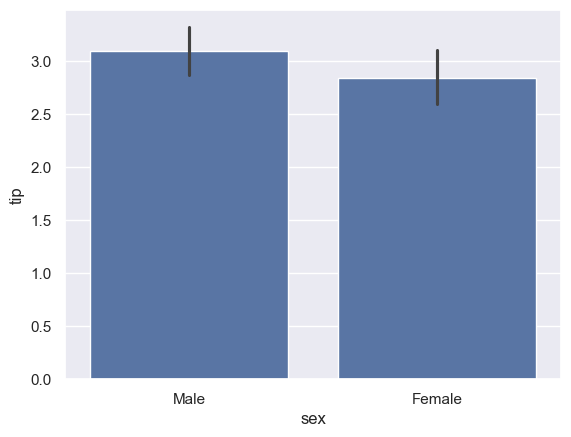

In [43]:
sns.barplot(data = tips_df, x = "sex", y = 'tip', estimator = np.mean )

* count plot

In [45]:
tips_df["sex"].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

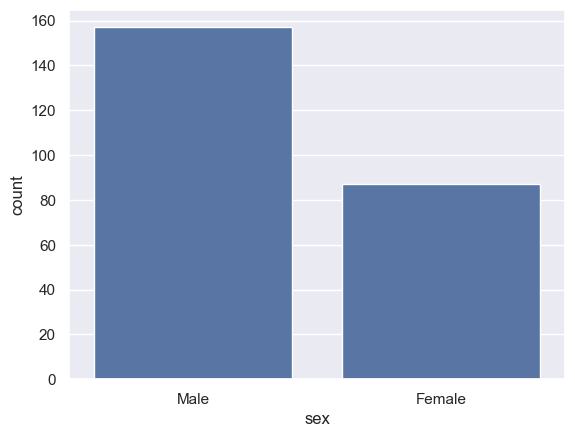

In [47]:
sns.countplot(data = tips_df, x = "sex");

#### Box plot
Box plot is a good indication of flow the values in the data are spread out ("minium, quartile (Q1), (Q3), median, and "maximum")
* Identify outliers
* Check if data is symmetrical
* Determine how tightly data is grouped

<Axes: xlabel='day', ylabel='total_bill'>

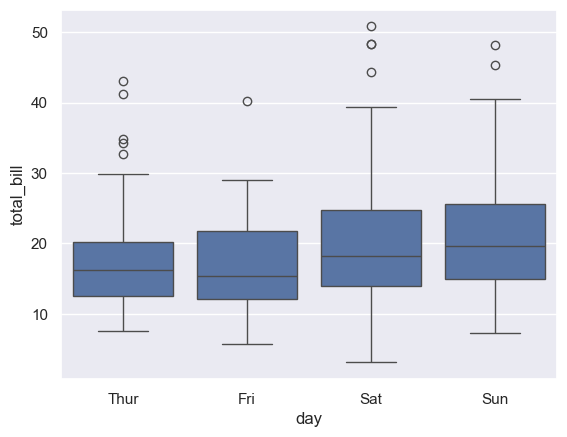

In [54]:
sns.boxplot(data = tips_df, x = "day", y = "total_bill")

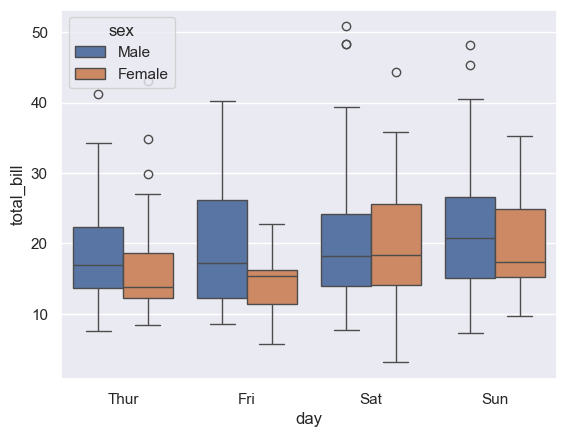

In [52]:
sns.boxplot(data = tips_df, x = "day", y = "total_bill", hue = "sex");

#### Facet grid
* Facet grid can be draen with up to three dimentions: row, col, and hue.
* The main approach for visualising data on this grid is with the FacetGrid.map() method.

In [55]:
tips_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


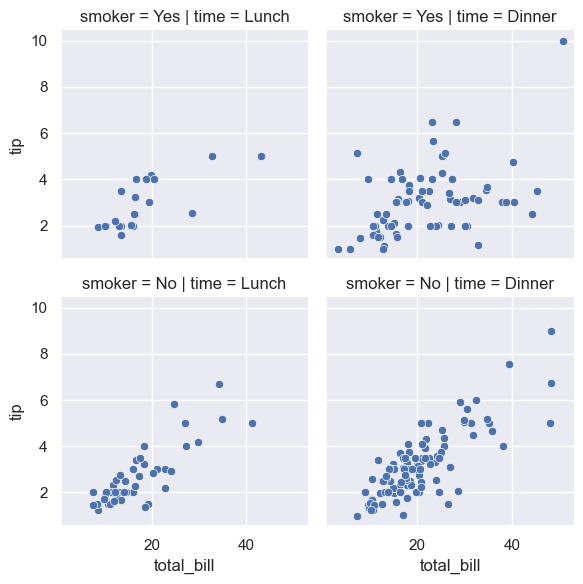

In [59]:
# sex, smoker, time
tip_fg = sns.FacetGrid(data = tips_df, row = "smoker", col = "time") # Create a class instance of Facet Grid class
tip_fg.map(sns.scatterplot, "total_bill", "tip")

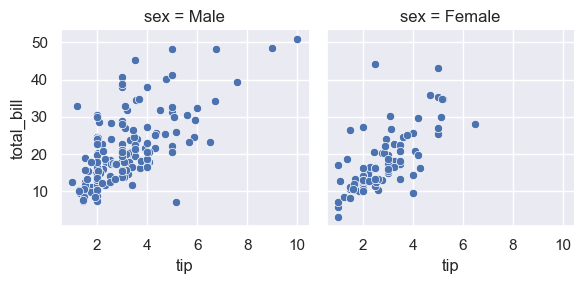

In [61]:
sns.FacetGrid(data = tips_df, col = "sex").map(sns.scatterplot, "tip", "total_bill" )

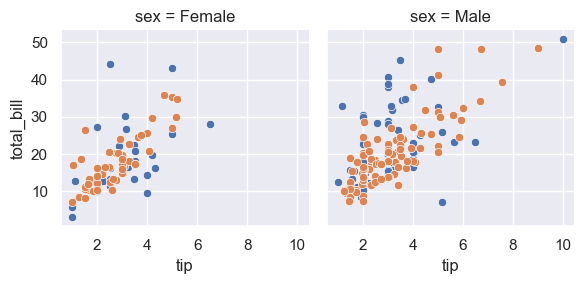

In [62]:
sns.FacetGrid(data = tips_df, col = "sex"
              , hue = "smoker", col_order = ["Female", "Male"]).map(sns.scatterplot, "tip", "total_bill" ) 

#### Joint plot
* joint distribution between two variables along with each variable's marginal distribution

In [69]:
pg_df = sns.load_dataset("penguins")
pg_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


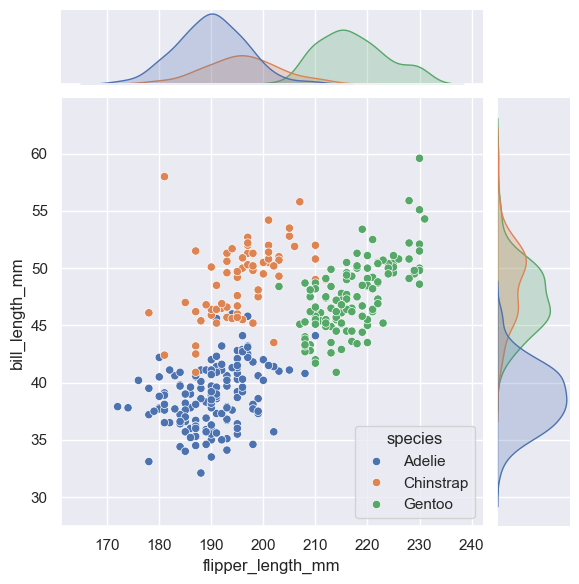

In [70]:
sns.jointplot(data = pg_df, x = "flipper_length_mm", y = "bill_length_mm", hue = "species")

#### Pair plot

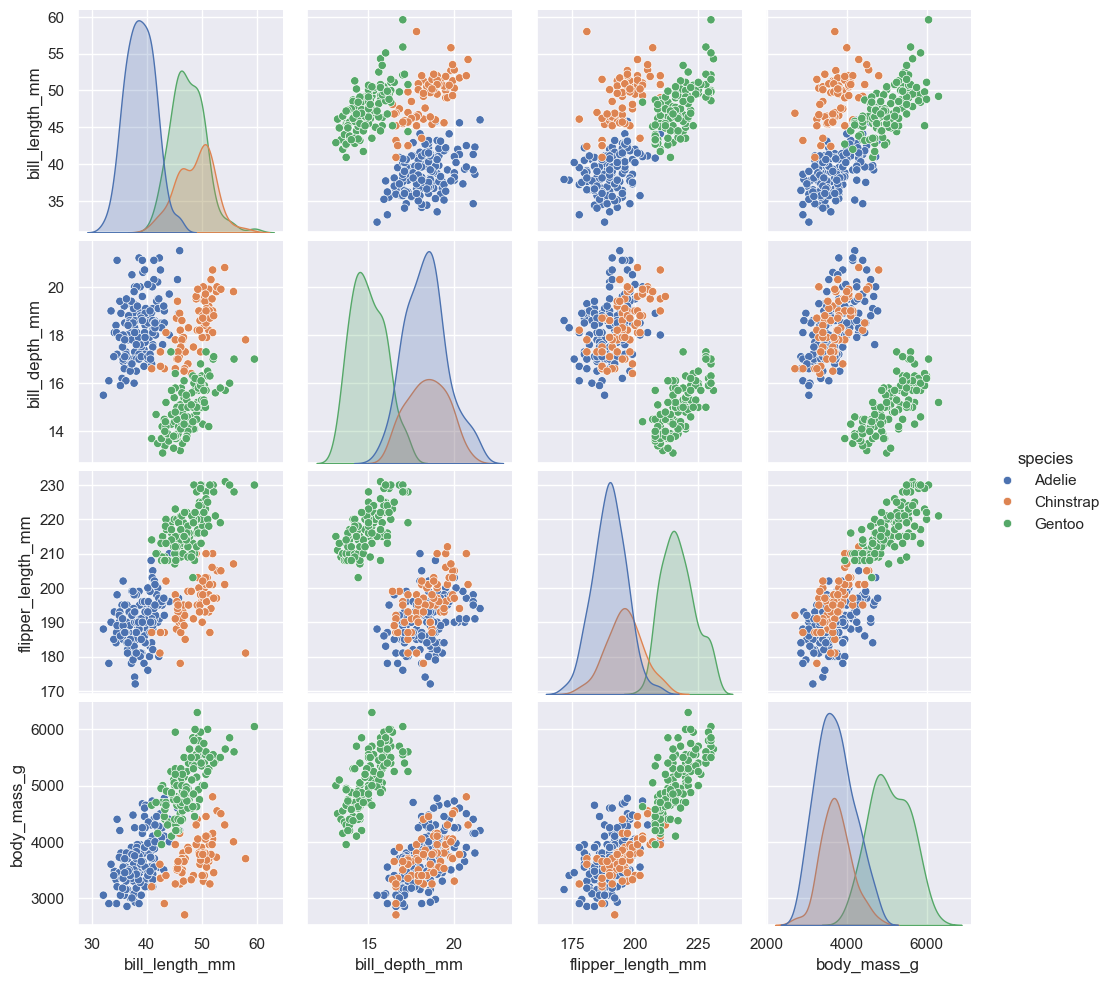

In [72]:
sns.pairplot(data = pg_df, hue = "species");